In [1]:
import pandas as pd
import numpy as np
ten_ticks_bars = pd.read_csv('C:/Users/Tibor/Data/formatted/ten_ticks_bars/tick_bars.csv')
MA_60 = []
MA_60_slope = []
for i in range(len(ten_ticks_bars.index)):
    if i < 60:
        MA_60.append(np.nan)
    else:
        MA_60.append(ten_ticks_bars['vwap'][i - 60:i].mean())
    if i < 120:
        MA_60_slope.append(np.nan)
    else:
        MA_60_slope.append(MA_60[i] - MA_60[i - 60])
ten_ticks_bars['MA_60'] = MA_60
ten_ticks_bars['MA_60_slope'] = MA_60_slope
ten_ticks_bars

,Unnamed: 0,tick,first_timestamp_millis,last_timestamp_millis,vwap,open,close,high,low,volume,volume_given,MA_60,MA_60_slope
0,0,0,1633046175816,1633046181019,9507,9508,9507,9508,9507,56747,14395,NaN,NaN
1,1,10,1633046181460,1633046186767,9507,9507,9506,9508,9506,252352,121878,NaN,NaN
2,2,20,1633046187165,1633046191578,9507,9506,9507,9508,9506,196172,28391,NaN,NaN
3,3,30,1633046191616,1633046193546,9505,9506,9505,9507,9505,492623,411672,NaN,NaN
4,4,40,1633046193956,1633046197954,9505,9504,9506,9506,9504,70819,39540,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42002,42002,420020,1633132786369,1633132788492,10406,10405,10406,10407,10405,336964,2648,10421.866667,13.350000
42003,42003,420030,1633132789041,1633132791699,10408,10406,10411,10411,10405,681774,1463,10421.616667,12.733333
42004,42004,420040,1633132791732,1633132794022,10411,10408,10412,10414,10408,302759,1863,10421.416667,12.150000
42005,42005,420050,1633132795655,1633132799229,10414,10414,10417,10417,10414,60366,1728,10421.250000,11.600000


(0.0, 1200.0)

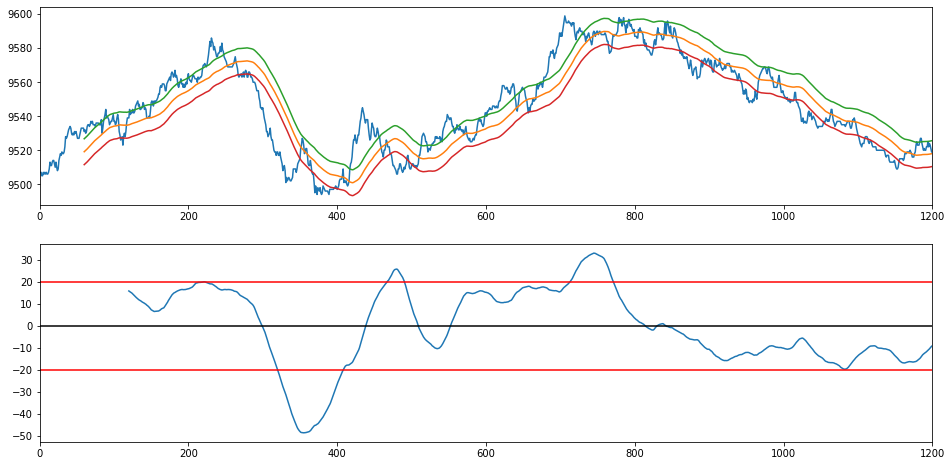

In [3]:
sample = 1200
import matplotlib
matplotlib.rcParams['figure.figsize'] = [16, 8]
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(ten_ticks_bars['vwap'].head(sample))
axs[0].plot(ten_ticks_bars['MA_60'].head(sample))
axs[0].plot(1.0008*ten_ticks_bars['MA_60'].head(sample))
axs[0].plot(ten_ticks_bars['MA_60'].div(1.0008).head(sample))
axs[1].plot(ten_ticks_bars['MA_60_slope'].head(sample))
axs[1].axhline(y=0, color='black')
axs[1].axhline(y=-20, color='red')
axs[1].axhline(y=20, color='red')
axs[0].set_xlim([0, sample])
axs[1].set_xlim([0, sample])

(array([  61.,   84.,  101.,  123.,  164.,  244.,  255.,  298.,  308.,
         376.,  392.,  567.,  639.,  705.,  807.,  955., 1067., 1083.,
        1218., 1423., 1370., 1532., 1521., 1836., 1826., 1918., 2147.,
        1920., 1994., 1796., 1718., 1630., 1482., 1342., 1299.,  837.,
         711.,  676.,  477.,  430.,  345.,  298.,  248.,  245.,  241.,
         201.,  111.,  100.,  117.]),
 array([-50, -48, -46, -44, -42, -40, -38, -36, -34, -32, -30, -28, -26,
        -24, -22, -20, -18, -16, -14, -12, -10,  -8,  -6,  -4,  -2,   0,
          2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
         28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48]),
 <BarContainer object of 49 artists>)

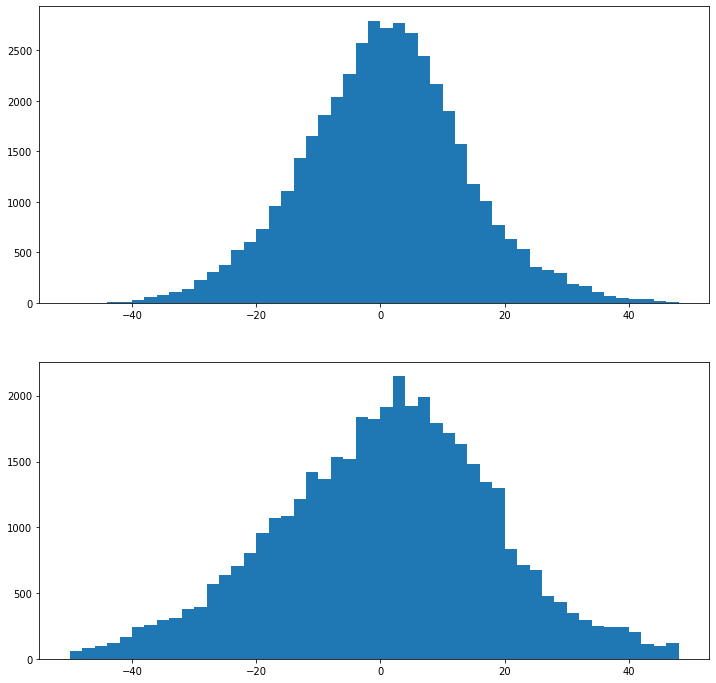

In [4]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12, 12]
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].hist(1e4*(ten_ticks_bars['vwap'] - ten_ticks_bars['MA_60'])/ten_ticks_bars['MA_60'], bins=range(-50, 50, 2))
axs[1].hist(ten_ticks_bars['MA_60_slope'], bins=range(-50, 50, 2))

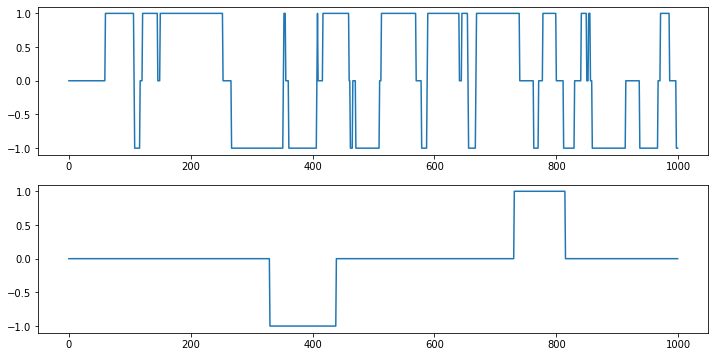

In [5]:
ma_signals = []
ma_indicators = []
ma_signal = 0
slope_signals = []
slope_indicators = []
slope_signal = 0
for i in range(len(ten_ticks_bars.index)):
    ma_indicator = (ten_ticks_bars['vwap'][i] - ten_ticks_bars['MA_60'][i])/ten_ticks_bars['MA_60'][i]
    slope_indicator = ten_ticks_bars['MA_60_slope'][i]
    ma_indicators.append(ma_indicator)
    slope_indicators.append(slope_indicator)
    
    if ma_signal == 0:
        if ma_indicator > 5e-4:
            ma_signal = 1
        if ma_indicator < -5e-4:
            ma_signal = -1
    if ma_signal == 1:
        if ma_indicator < -5e-4:
            ma_signal = -1
        if ma_indicator < 0:
            ma_signal = 0
    if ma_signal == -1:
        if ma_indicator > 5e-4:
            ma_signal = 1
        if ma_indicator > 0:
            ma_signal = 0
            
    if slope_signal == 0:
        if slope_indicator > 30:
            slope_signal = 1
        if slope_indicator < -30:
            slope_signal = -1
    if slope_signal == 1:
        if slope_indicator < -30:
            slope_signal = -1
        if slope_indicator < 0:
            slope_signal = 0
    if slope_signal == -1:
        if slope_indicator > 30:
            slope_signal = 1
        if slope_indicator > 0:
            slope_signal = 0

    ma_signals.append(ma_signal)
    slope_signals.append(slope_signal)
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12, 6]
fig, axs = plt.subplots(2)
sample = 1000
axs[0].plot(ma_signals[:sample])
axs[1].plot(slope_signals[:sample])

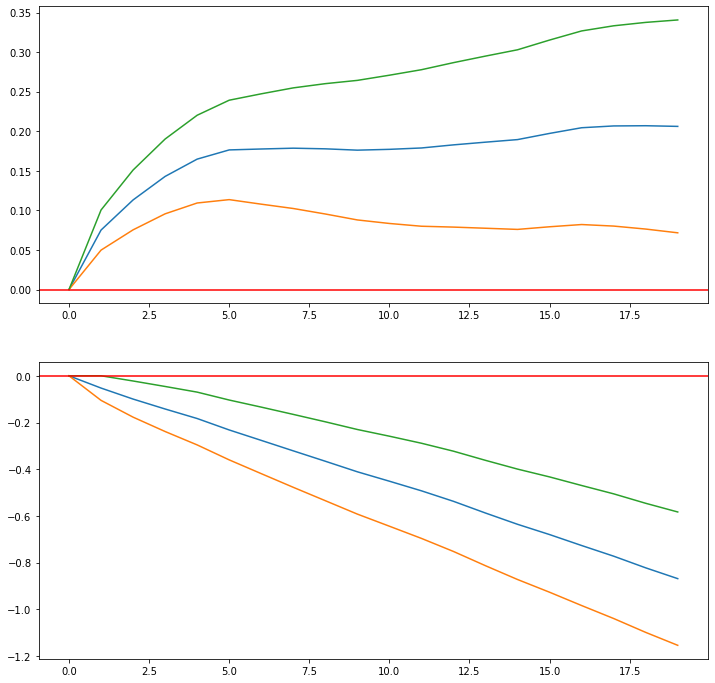

In [6]:
df = ten_ticks_bars
df['ma_signa'] = ma_signals
indices_ma_signal_pos = df[df['ma_signa'] == 1].index
indices_ma_signal_neg = df[df['ma_signa'] == -1].index
df['slope_signal'] = slope_signals
indices_slope_signal_pos = df[df['slope_signal'] == 1].index
indices_slope_signal_neg = df[df['slope_signal'] == -1].index

import matplotlib
matplotlib.rcParams['figure.figsize'] = [12, 12]
fig, axs = plt.subplots(2)

def f(j, indices_signal_pos, indices_signal_neg):
    means = []
    minimums = []
    maximums = []
    for i in range(20):
        indices_pos_after = indices_signal_pos + i
        indices_neg_after = indices_signal_neg + i
        indices_signal_pos = indices_signal_pos[indices_pos_after < len(df.index)]
        indices_signal_neg = indices_signal_neg[indices_neg_after < len(df.index)]
        indices_pos_after = indices_pos_after[indices_pos_after < len(df.index)]
        indices_neg_after = indices_neg_after[indices_neg_after < len(df.index)]
        pos_returns = 1e4*np.divide(np.array(df['vwap'][indices_pos_after]) - np.array(df['vwap'][indices_signal_pos]), np.array(df['vwap'][indices_signal_pos]))
        neg_returns = 1e4*np.divide(np.array(df['vwap'][indices_signal_neg]) - np.array(df['vwap'][indices_neg_after]), np.array(df['vwap'][indices_signal_neg]))
        returns = np.concatenate((pos_returns, neg_returns))
        mean =  returns.mean()
        std =   returns.std()
        count = returns.size
        interval = 2*std/np.sqrt(count)
        means.append(mean)
        minimums.append(mean - interval)
        maximums.append(mean + interval)
    axs[j].plot(means)
    axs[j].plot(minimums)
    axs[j].plot(maximums)
    axs[j].axhline(y=0, color='red')

f(0, indices_ma_signal_pos, indices_ma_signal_neg)
f(1, indices_slope_signal_pos, indices_slope_signal_neg)


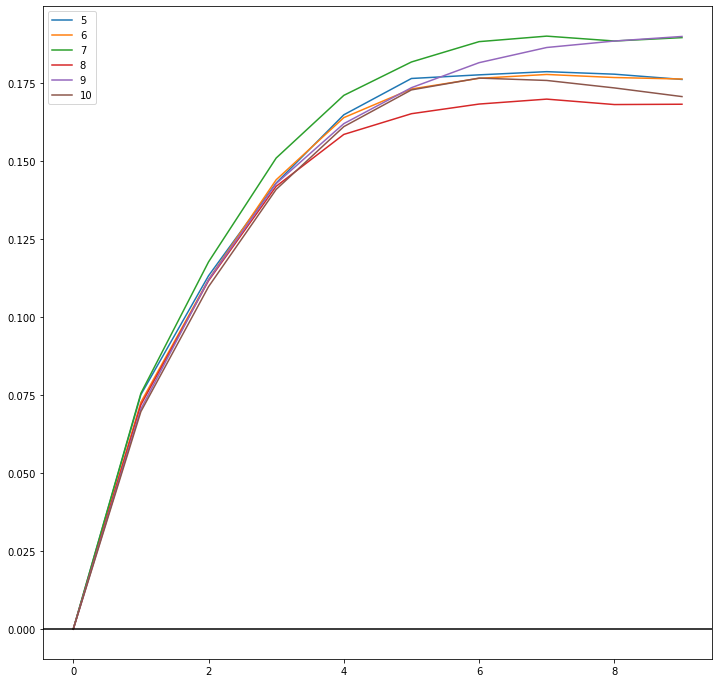

In [24]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12, 12]
for threshold in range(5, 11):
    signals = []
    indicators = []
    signal = 0
    for i in range(len(ten_ticks_bars.index)):
        indicator = (ten_ticks_bars['vwap'][i] - ten_ticks_bars['MA_60'][i])/ten_ticks_bars['MA_60'][i]
        indicators.append(indicator)
        if signal == 0:
            if indicator > threshold*1e-4:
                signal = 1
            if indicator < -threshold*1e-4:
                signal = -1
        if signal == 1:
            if indicator < -threshold*1e-4:
                signal = -1
            if indicator < 0:
                signal = 0
        if signal == -1:
            if indicator > threshold*1e-4:
                signal = 1
            if indicator > 0:
                signal = 0
        signals.append(signal)
    df = ten_ticks_bars
    df['signal'] = signals
    indices_signal_pos = df[df['signal'] == 1].index
    indices_signal_neg = df[df['signal'] == -1].index
    means = []
    minimums = []
    maximums = []
    for i in range(10):
        indices_pos_after = indices_signal_pos + i
        indices_neg_after = indices_signal_neg + i
        indices_signal_pos = indices_signal_pos[indices_pos_after < len(df.index)]
        indices_signal_neg = indices_signal_neg[indices_neg_after < len(df.index)]
        indices_pos_after = indices_pos_after[indices_pos_after < len(df.index)]
        indices_neg_after = indices_neg_after[indices_neg_after < len(df.index)]
        pos_returns = 1e4*np.divide(np.array(df['vwap'][indices_pos_after]) - np.array(df['vwap'][indices_signal_pos]), np.array(df['vwap'][indices_signal_pos]))
        neg_returns = 1e4*np.divide(np.array(df['vwap'][indices_signal_neg]) - np.array(df['vwap'][indices_neg_after]), np.array(df['vwap'][indices_signal_neg]))
        returns = np.concatenate((pos_returns, neg_returns))
        mean =  returns.mean()
        means.append(mean)
    plt.plot(means, label=threshold)
plt.axhline(y=0, color='black')
plt.legend()

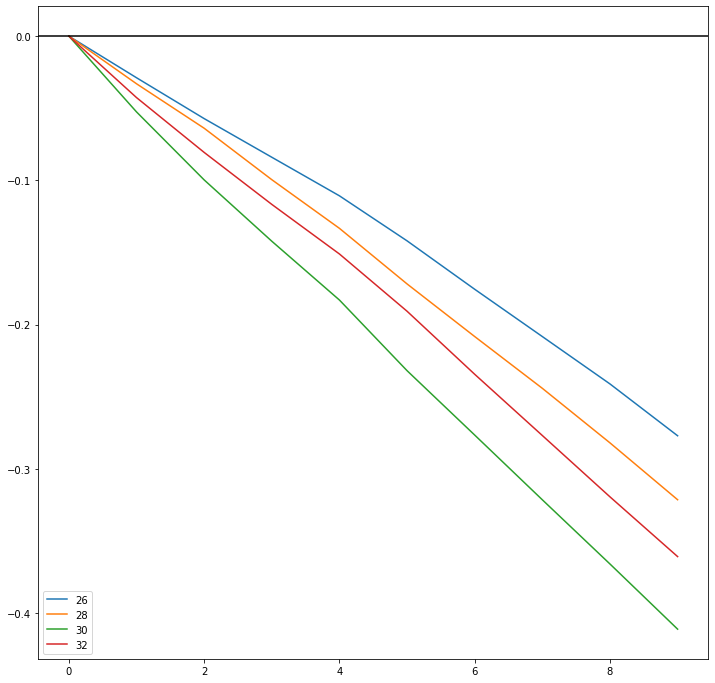

In [7]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12, 12]
for threshold in range(26, 34, 2):
    signals = []
    indicators = []
    signal = 0
    for i in range(len(ten_ticks_bars.index)):
        indicator = ten_ticks_bars['MA_60_slope'][i]
        indicators.append(indicator)
        if signal == 0:
            if indicator > threshold:
                signal = 1
            if indicator < -threshold:
                signal = -1
        if signal == 1:
            if indicator < -threshold:
                signal = -1
            if indicator < 0:
                signal = 0
        if signal == -1:
            if indicator > threshold:
                signal = 1
            if indicator > 0:
                signal = 0
        signals.append(signal)
    df = ten_ticks_bars
    df['signal'] = signals
    indices_signal_pos = df[df['signal'] == 1].index
    indices_signal_neg = df[df['signal'] == -1].index
    means = []
    minimums = []
    maximums = []
    for i in range(10):
        indices_pos_after = indices_signal_pos + i
        indices_neg_after = indices_signal_neg + i
        indices_signal_pos = indices_signal_pos[indices_pos_after < len(df.index)]
        indices_signal_neg = indices_signal_neg[indices_neg_after < len(df.index)]
        indices_pos_after = indices_pos_after[indices_pos_after < len(df.index)]
        indices_neg_after = indices_neg_after[indices_neg_after < len(df.index)]
        pos_returns = 1e4*np.divide(np.array(df['vwap'][indices_pos_after]) - np.array(df['vwap'][indices_signal_pos]), np.array(df['vwap'][indices_signal_pos]))
        neg_returns = 1e4*np.divide(np.array(df['vwap'][indices_signal_neg]) - np.array(df['vwap'][indices_neg_after]), np.array(df['vwap'][indices_signal_neg]))
        returns = np.concatenate((pos_returns, neg_returns))
        mean =  returns.mean()
        means.append(mean)
    plt.plot(means, label=threshold)
plt.axhline(y=0, color='black')
plt.legend()